In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)


In [4]:
print(pkmndata.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


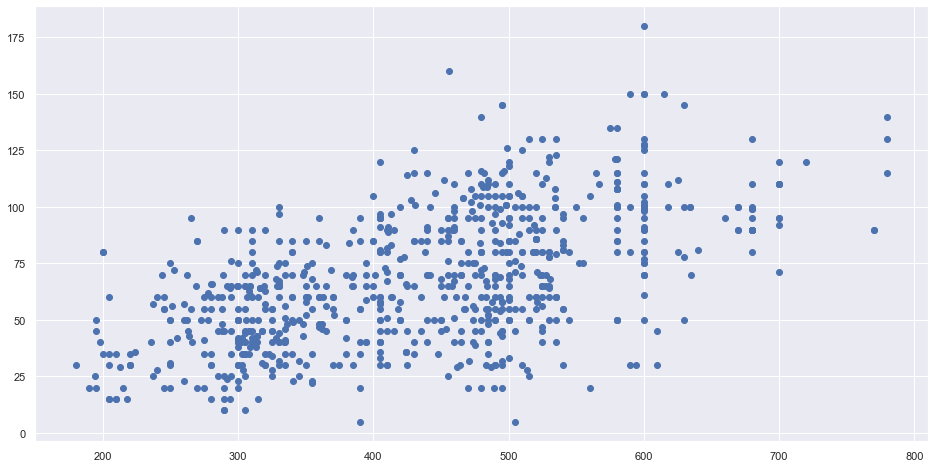

In [5]:
# Extract the Features from the Data
X = pd.DataFrame(pkmndata[["Total", "Speed"]])

# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Total", y = "Speed", data = X)

In [6]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 4

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

# Print the Cluster Centers
print("Features", "\tTotal", "\tSpeed")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	Total 	Speed

Cluster 0:	289.79	47.46	
Cluster 1:	496.52	75.24	
Cluster 2:	396.6	64.12	
Cluster 3:	625.46	98.1	


C:\Users\amosn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster', ylabel='count'>

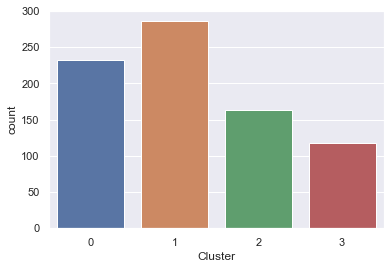

In [7]:
# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

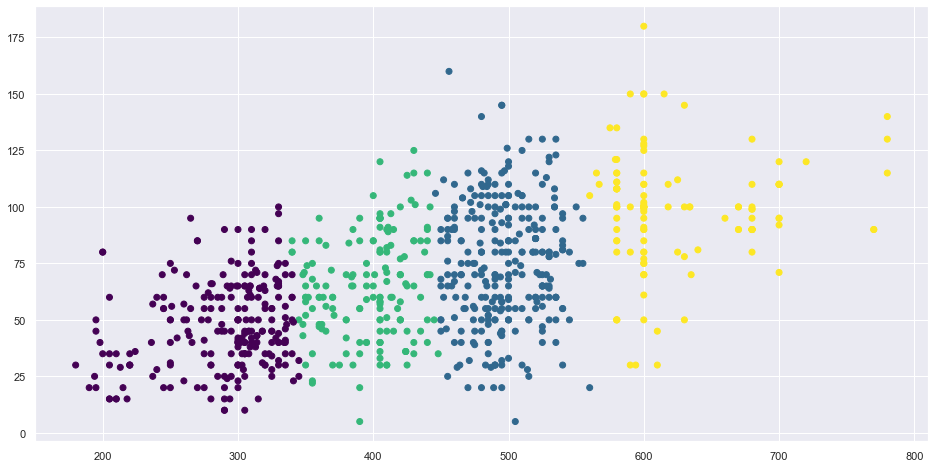

In [8]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "Total", y = "Speed", c = "Cluster", cmap = 'viridis', data = X_labeled)

In [9]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)

Within Cluster Sum of Squares : 1454411.0967934758


C:\Users\amosn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


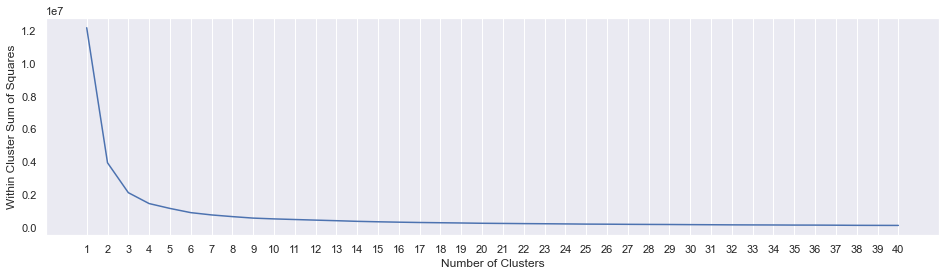

In [10]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Extract the Features from the Data
X = pd.DataFrame(pkmndata[["Total", "Speed"]])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()